In [16]:
from scipy import misc
from scipy import ndimage
from scipy.fft import ifftn
from scipy.spatial.distance import pdist
from scipy.ndimage import rotate
import cv2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from math import sqrt 

import warnings
warnings.filterwarnings('ignore')

### IMAGEM ESCOLHIDA

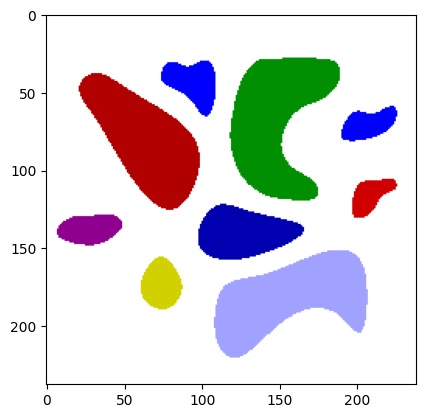

In [17]:
img_file_name = 'images/objetos3.png'
# Read the image
img = cv2.imread(img_file_name)
plt.imshow(img)

## Transformação de cores

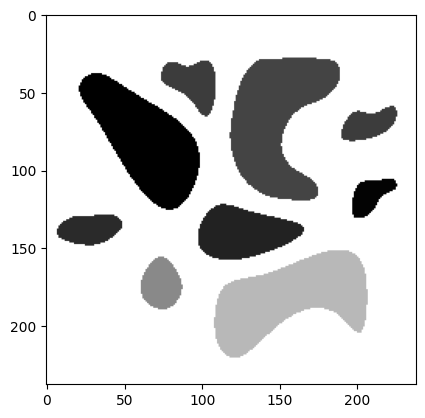

In [18]:
img = cv2.imread(img_file_name, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, 'gray')


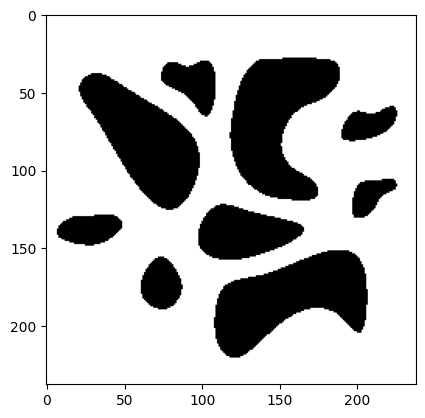

In [19]:
(t, img_bw) = cv2.threshold(img,210,255, cv2.THRESH_BINARY)
plt.imshow(img_bw, 'gray')

## Detecção de bordas

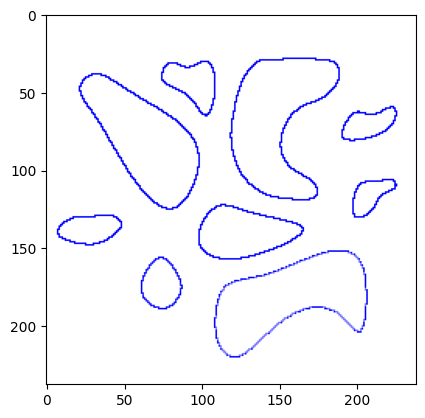

In [20]:
edges = cv2.Laplacian(img, cv2.CV_16S, ksize=3).astype(int)
background = np.where(edges,255,255)
background_minus_edges = background - edges
edges_img = cv2.merge((background_minus_edges, background_minus_edges, background))
edges_img[edges_img < 0] = 0
edges_img[edges_img > 255] = 255
plt.imshow(edges_img, 'gray')

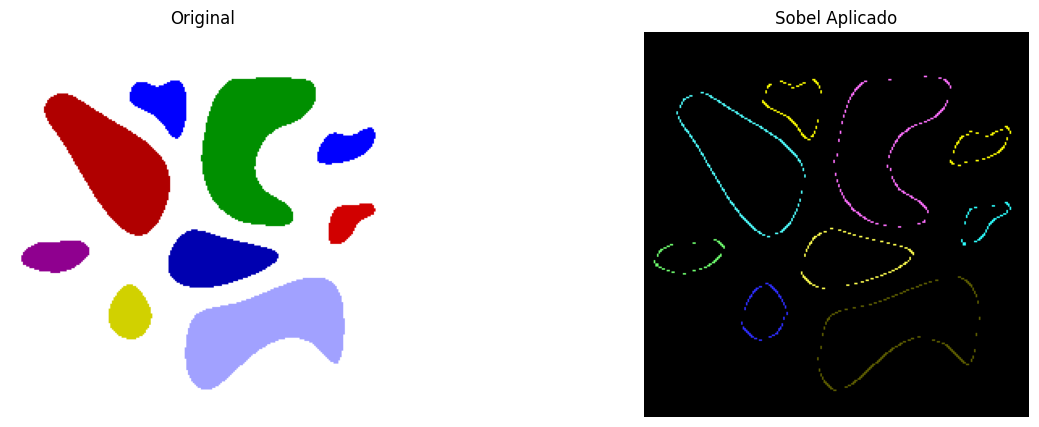

In [21]:
img = cv.imread(img_file_name)
sobel = cv.Sobel(img, -1, 1, 1)

fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(sobel, cmap = 'gray')
ax[1].set_title('Sobel Aplicado')
ax[1].axis('off')
plt.show()

## Extração de propriedades dos objetos

In [22]:
cs = cv2.findContours(img_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
cs = np.delete(cs, 0)
print('numero de regiões',len(cs))

numero de regiões 9


In [23]:
areas = np.zeros((len(cs))) 
# salvar as áreas para usar no histograma

## Calculo da excentricidade

In [24]:
def calc_ecc(c):
    (eM, em) = cv2.fitEllipse(c)[1]
    (aux1, aux2) = (em / 2 , eM / 2) #em = eixo menor / eM = eixo maior
    # aux1 = em/2 ; aux2 = eM/2
    # ecc = sqrt(aux1*aux1 - aux2*aux2) / aux1
    ecc =round(np.sqrt(pow(aux1,2) - pow(aux2,2))/aux1,2)
    return ecc

In [26]:
# Print das propriedades
for i, c in enumerate(cs):
    mms = cv2.moments(c)
    cx, cy = (int(round(mms['m10']/mms['m00'])), int(round(mms['m01']/mms['m00'])))
    area = cv2.contourArea(c)
    areas[i] = area
    p = cv2.arcLength(c,True)
    ecc = calc_ecc(c)
    s = area/cv2.contourArea(cv2.convexHull(c))
    print('região {:>2g}:  área: {:<10.2f}  perímetro: {:<10.2f}  excentricidade: {:<4.2f}  solidez: {:<4.2f}'.format(i, area, p, ecc, s))

região  0:  área: 716.50      perímetro: 101.98      excentricidade: 0.63  solidez: 0.98
região  1:  área: 4067.00     perímetro: 311.08      excentricidade: 0.88  solidez: 0.78
região  2:  área: 688.50      perímetro: 108.67      excentricidade: 0.88  solidez: 0.97
região  3:  área: 1761.50     perímetro: 179.78      excentricidade: 0.88  solidez: 0.97
região  4:  área: 478.00      perímetro: 94.43       excentricidade: 0.88  solidez: 0.93
região  5:  área: 584.00      perímetro: 104.91      excentricidade: 0.87  solidez: 0.91
região  6:  área: 3690.50     perímetro: 265.12      excentricidade: 0.91  solidez: 0.98
região  7:  área: 843.50      perímetro: 125.64      excentricidade: 0.75  solidez: 0.90
região  8:  área: 4107.00     perímetro: 319.42      excentricidade: 0.74  solidez: 0.75


## Histograma


    numero de regiões pequenas: 5 

    numero de regiões medias: 1 

    numero de regiões grandes: 3



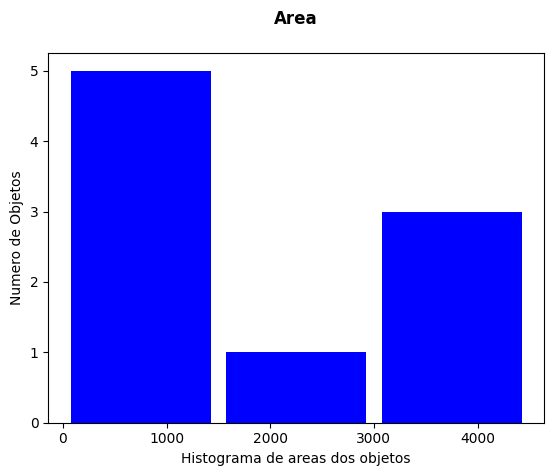

In [63]:
small = len(areas[areas < 1500])
medium = len(areas) - (len(areas[areas < 1500]) + len(areas[areas >= 3000]))
big = len(areas[areas >= 3000])
colors = ['blue']
labels = [small, medium, big]
plt.hist(x=areas, bins=[0, 1500, 3000, 4500],color = colors, label = labels, rwidth=.9)

result = """
    numero de regiões pequenas: {} \n
    numero de regiões medias: {} \n
    numero de regiões grandes: {}
"""
print(result.format(small, medium, big))

plt.title('Area\n', fontweight = 'bold')
plt.xlabel("Histograma de areas dos objetos")
plt.ylabel("Numero de Objetos")
plt.show()